# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
data_df=pd.read_csv(r'C:\AIML\05Assignments\breast-cancer-wisconsin-data.csv')

In [3]:
data_df.head(10) # check for data load

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
print('Data Type of Columns\n',data_df.dtypes)

Data Type of Columns
 ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [6]:
print ('shape of data set :',data_df.shape) # shape of data set

shape of data set : (699, 11)


In [7]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
data_df.isnull().any() # check for missing values


ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

* no missing

In [9]:
data_df.isin(['?']).sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [10]:
data_df['Bare Nuclei'].replace(to_replace='?',value=np.nan,inplace=True) #replace with nan

In [11]:
data_df['Bare Nuclei'].astype(float).mean() # print mean

3.5446559297218156

In [12]:
data_df['Bare Nuclei'].astype(float).median() # print median

1.0

In [13]:
data_df['Bare Nuclei'].astype(float).mode() #print mode

0    1.0
dtype: float64

In [14]:
data_df.fillna(data_df['Bare Nuclei'].median(),inplace=True) # replace with median

In [15]:
data_df.isnull().any() #check for change

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [16]:
data_df.drop_duplicates(subset=['ID'], keep="first", inplace=True)

In [17]:
data_df.shape # check for deletion

(645, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [18]:
data_df.drop(['ID'], inplace=True, axis=1) # drop column ID

In [19]:
data_df.head() #check for dorp

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [20]:
# Check for correlation of variable 

In [21]:
data_df.dtypes # Check datatype

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [22]:
data_df['Bare Nuclei']=data_df['Bare Nuclei'].astype(float)

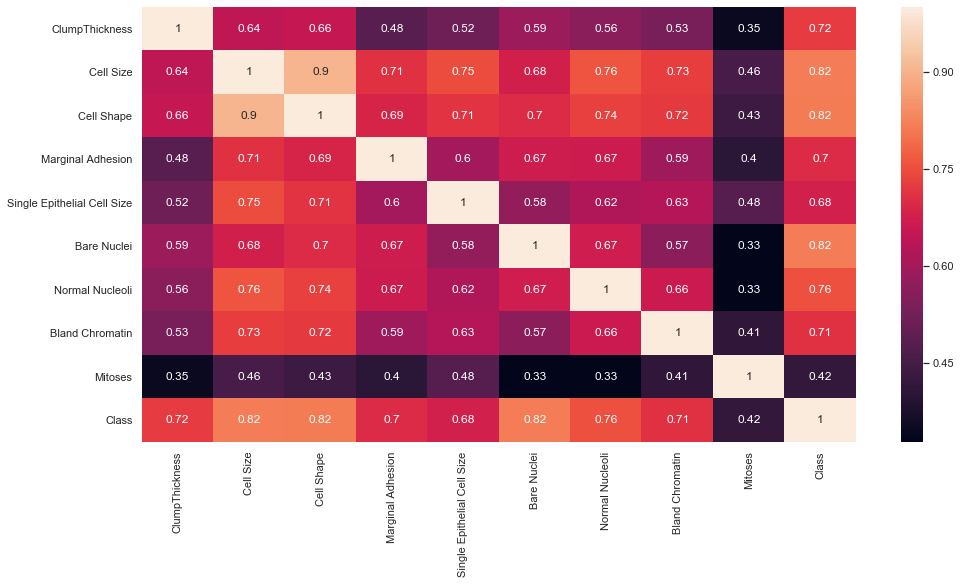

In [23]:
sns.set()
plt.figure(figsize=(16,8))
sns.heatmap(data_df.corr(),annot=True)

In [24]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [25]:
#Let us check for pair plots

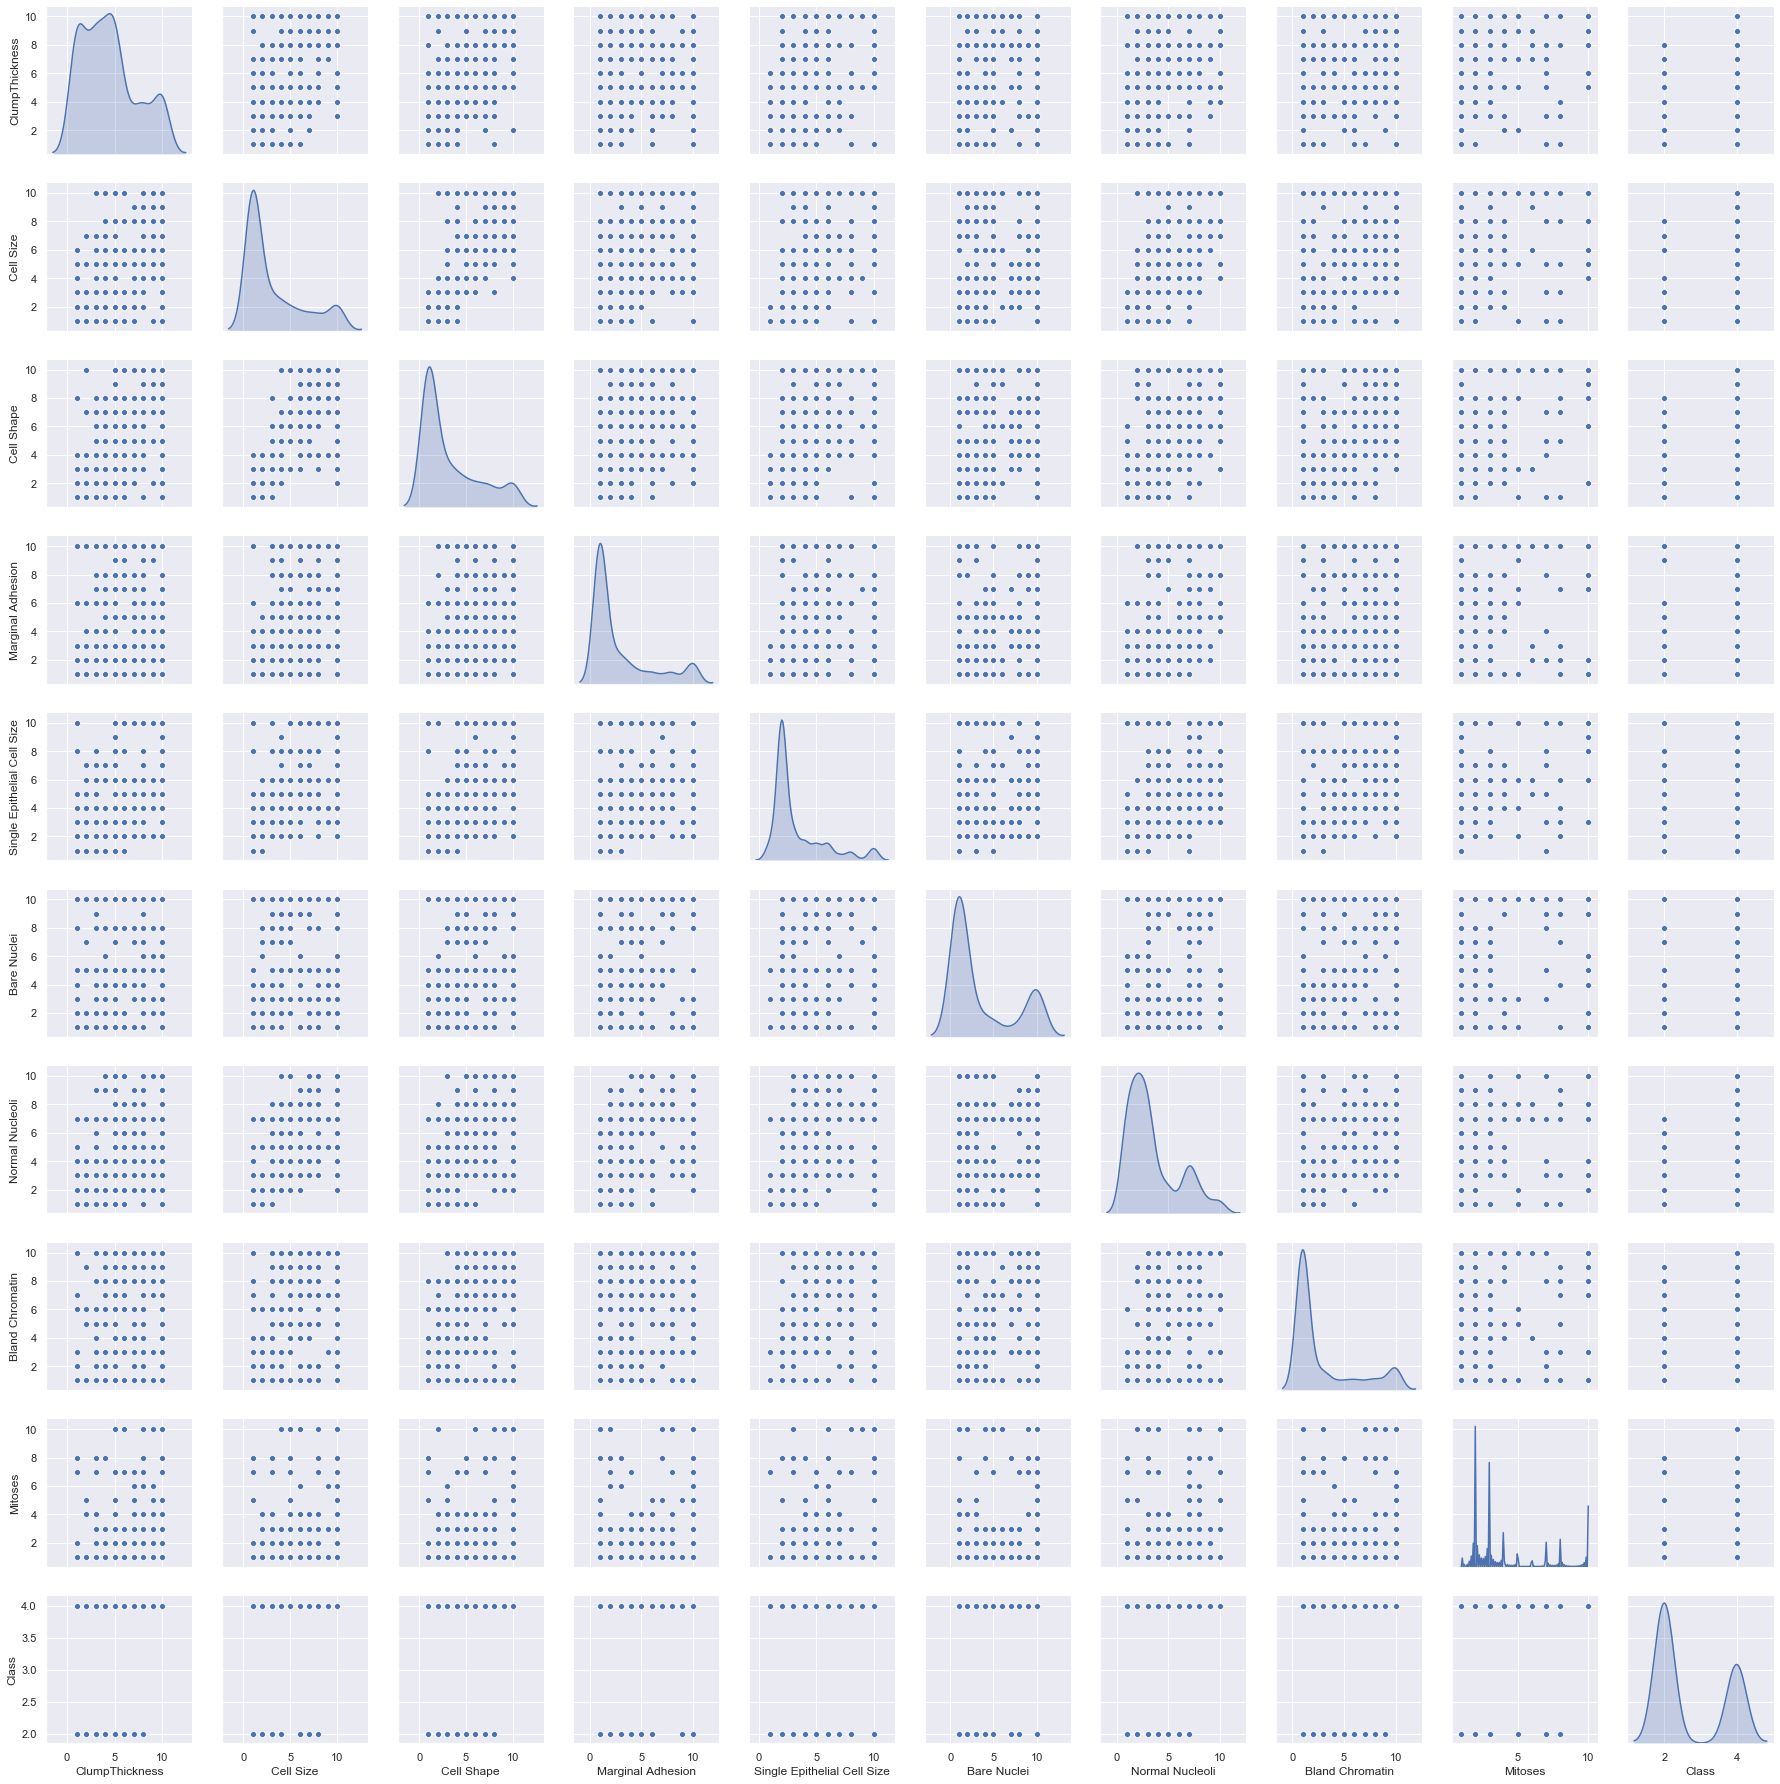

In [26]:
sns.pairplot(data_df,diag_kind='kde')

In [27]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [28]:
# We could see most of the outliers are now removed using box plot

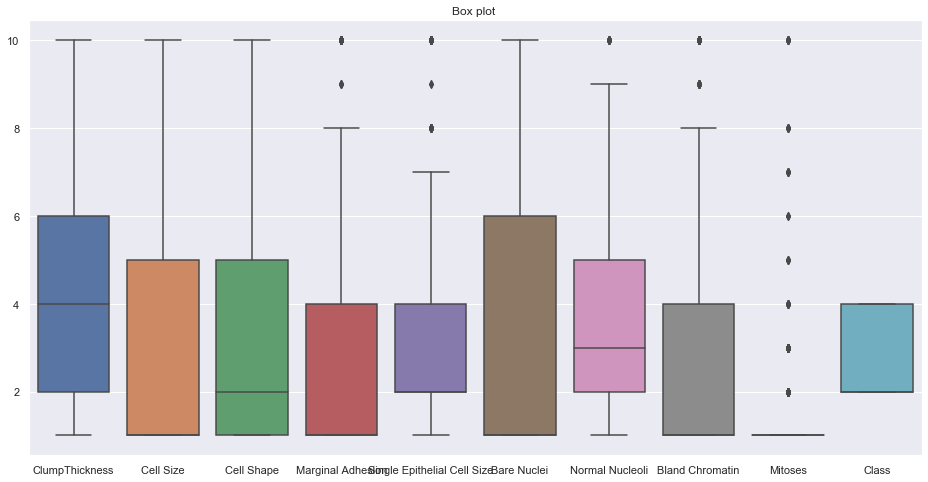

In [29]:

plt.figure(figsize=(16,8))
plt.title('Box plot ')
sns.boxplot(data=data_df)


plt.figure(figsize=(16,8))
plt.title('Box plot ')
sns.boxplot(data=data_df)

In [30]:
data_df.quantile(q=[.75]).transpose() # check teh 75% values

,0.75
ClumpThickness,6.0
Cell Size,5.0
Cell Shape,5.0
Marginal Adhesion,4.0
Single Epithelial Cell Size,4.0
Bare Nuclei,6.0
Normal Nucleoli,5.0
Bland Chromatin,4.0
Mitoses,1.0
Class,4.0


In [31]:
data_df.columns # print columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [32]:
# replace outlier (outside wishker using 75% value)
data_df.loc[data_df['Marginal Adhesion']>8,'Marginal Adhesion']=4
data_df.loc[data_df['Single Epithelial Cell Size']>7,'Single Epithelial Cell Size']=4
data_df.loc[data_df['Normal Nucleoli']>9,'Normal Nucleoli']=5
data_df.loc[data_df['Bland Chromatin']>8,'Bland Chromatin']=4
data_df.loc[data_df['Mitoses']>1,'Mitoses']=1

In [33]:
data_df.isnull().any() # check for replacement

ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

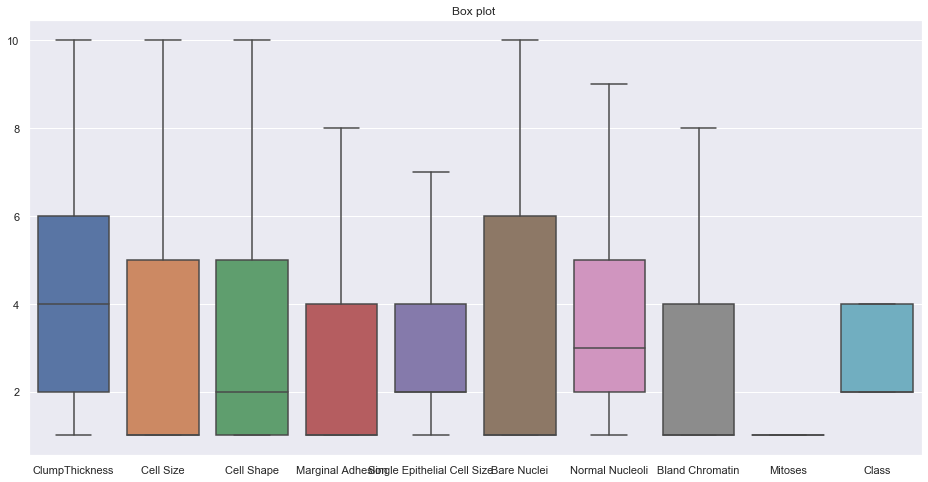

In [34]:
# check using outlier again after treatment
plt.figure(figsize=(16,8))
plt.title('Box plot ')
sns.boxplot(data=data_df)

# Q6 Create a covariance matrix for identifying Principal components

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
X= data_df.drop('Class',axis=1)

In [37]:
X.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

In [38]:
# PCA
# Step 1 - Create covariance matrix


In [39]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.0015528  0.64576496 0.65699092 0.49124862 0.53079914 0.58950616
  0.56309239 0.51673451 0.        ]
 [0.64576496 1.0015528  0.90520515 0.69067357 0.73380114 0.6774891
  0.725848   0.65666416 0.        ]
 [0.65699092 0.90520515 1.0015528  0.65619951 0.70779938 0.70021306
  0.70298946 0.63643468 0.        ]
 [0.49124862 0.69067357 0.65619951 1.0015528  0.63816968 0.64441581
  0.65975317 0.5776715  0.        ]
 [0.53079914 0.73380114 0.70779938 0.63816968 1.0015528  0.61497867
  0.62511979 0.61854678 0.        ]
 [0.58950616 0.6774891  0.70021306 0.64441581 0.61497867 1.0015528
  0.68258831 0.5768511  0.        ]
 [0.56309239 0.725848   0.70298946 0.65975317 0.62511979 0.68258831
  1.0015528  0.61329607 0.        ]
 [0.51673451 0.65666416 0.63643468 0.5776715  0.61854678 0.5768511
  0.61329607 1.0015528  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [40]:
# Step 2- Get eigen values and eigen vector

In [41]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)


Eigen Vectors 
%s [[ 0.31713666 -0.00876171  0.8186989   0.05233146 -0.13684663 -0.19832614
   0.38043892  0.15345057  0.        ]
 [ 0.38865151 -0.72756533  0.05410431  0.06838709  0.37088197  0.25456343
  -0.27490745  0.18456583  0.        ]
 [ 0.38418957  0.67466311  0.13909158  0.03690255  0.35854673  0.37035879
  -0.32164495  0.08569088  0.        ]
 [ 0.34277449  0.05779594 -0.42603663 -0.38046393 -0.02289837  0.14248921
   0.56441822  0.46207124  0.        ]
 [ 0.35050383  0.04091894 -0.23508659  0.24831088  0.47791284 -0.47222574
   0.29538453 -0.46893374  0.        ]
 [ 0.35102565 -0.0875887   0.04029792 -0.44631753 -0.34840797  0.30525069
  -0.01452768 -0.67343062  0.        ]
 [ 0.35723267  0.04969142 -0.11763123 -0.265619   -0.27278331 -0.62780863
  -0.51970445  0.21651304  0.        ]
 [ 0.33104568  0.01567987 -0.2349988   0.71767606 -0.53892479  0.16756069
   0.0106273   0.03535642  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [42]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.532630048454752, array([0.31713666, 0.38865151, 0.38418957, 0.34277449, 0.35050383,
       0.35102565, 0.35723267, 0.33104568, 0.        ])), (0.5475806931471275, array([ 0.8186989 ,  0.05410431,  0.13909158, -0.42603663, -0.23508659,
        0.04029792, -0.11763123, -0.2349988 ,  0.        ])), (0.4565739991267272, array([ 0.05233146,  0.06838709,  0.03690255, -0.38046393,  0.24831088,
       -0.44631753, -0.265619  ,  0.71767606,  0.        ])), (0.4168137903414122, array([-0.13684663,  0.37088197,  0.35854673, -0.02289837,  0.47791284,
       -0.34840797, -0.27278331, -0.53892479,  0.        ])), (0.3431075966263001, array([ 0.38043892, -0.27490745, -0.32164495,  0.56441822,  0.29538453,
       -0.01452768, -0.51970445,  0.0106273 ,  0.        ])), (0.32877421363397313, array([ 0.15345057,  0.18456583,  0.08569088,  0.46207124, -0.46893374,
       -0.67343062,  0.21651304,  0.03535642,  0.        ])), (0.2952998903280314, array([-0.19832614,  0.25456343,  0.37035879,  0.14248921

In [43]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)   
# cumulative reaching almost 100%

In [44]:
var_explained

[0.6905065409311748,
 0.06834146635402137,
 0.05698326655767683,
 0.052020945926331316,
 0.042821955858011115,
 0.04103306077137186,
 0.03685525763008766,
 0.01143750597132492,
 0.0]

In [45]:
cum_var_exp

array([0.69050654, 0.75884801, 0.81583127, 0.86785222, 0.91067418,
       0.95170724, 0.98856249, 1.        , 1.        ])

90% variance is epxlainted by frist 5 componnents

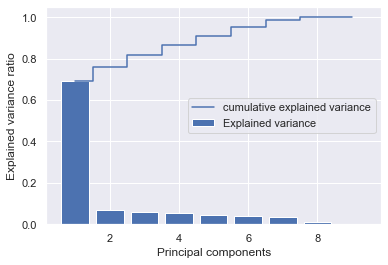

In [46]:
plt.bar([1,2,3,4,5,6,7,8,9], var_explained,label='Explained variance')
plt.step([1,2,3,4,5,6,7,8,9],cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca=PCA(n_components=7) # seven components
X = pca.fit_transform(X)

In [49]:
pca.explained_variance_ratio_

array([0.71849677, 0.08437564, 0.06976486, 0.04040025, 0.03078343,
       0.02689261, 0.01558107])

# Q10 Find correlation between components and features

In [50]:
pd_comp=pd.DataFrame(pca.components_,columns=data_df.drop("Class",axis=1).columns)

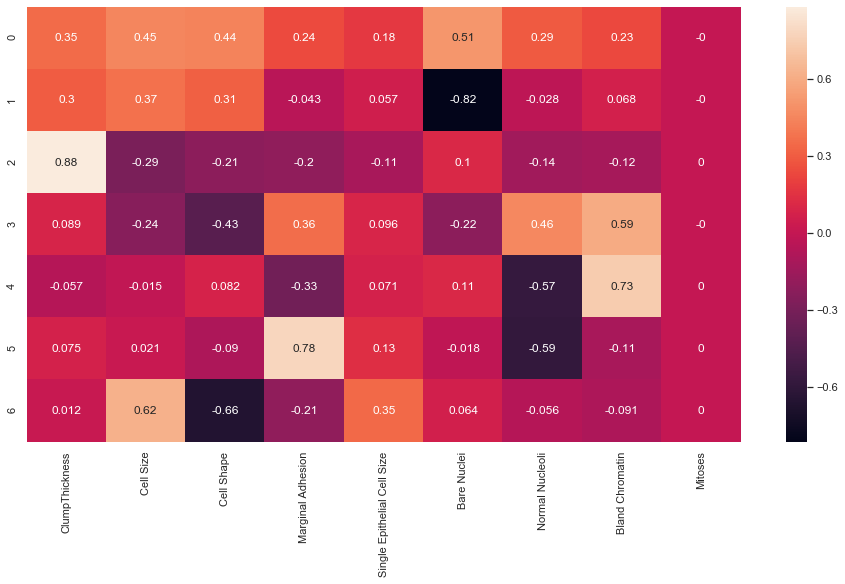

In [51]:
plt.figure(figsize=(16,8))
sns.heatmap(pd_comp,annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [52]:
jokes_df=pd.read_csv('jokes.csv')

In [53]:
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [54]:
ratings=jokes_df.iloc[0:200,1:]

In [55]:
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [56]:
ratings.replace(99,0,inplace=True)

In [57]:
ratings.isin([99]).any()

Joke1      False
Joke2      False
Joke3      False
Joke4      False
Joke5      False
Joke6      False
Joke7      False
Joke8      False
Joke9      False
Joke10     False
Joke11     False
Joke12     False
Joke13     False
Joke14     False
Joke15     False
Joke16     False
Joke17     False
Joke18     False
Joke19     False
Joke20     False
Joke21     False
Joke22     False
Joke23     False
Joke24     False
Joke25     False
Joke26     False
Joke27     False
Joke28     False
Joke29     False
Joke30     False
           ...  
Joke71     False
Joke72     False
Joke73     False
Joke74     False
Joke75     False
Joke76     False
Joke77     False
Joke78     False
Joke79     False
Joke80     False
Joke81     False
Joke82     False
Joke83     False
Joke84     False
Joke85     False
Joke86     False
Joke87     False
Joke88     False
Joke89     False
Joke90     False
Joke91     False
Joke92     False
Joke93     False
Joke94     False
Joke95     False
Joke96     False
Joke97     False
Joke98     Fal

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [58]:
ratings.apply(np.mean,axis=0).sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64